In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class Label', 'Alcohol', 'Malic Acid']

In [9]:
df.head()

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

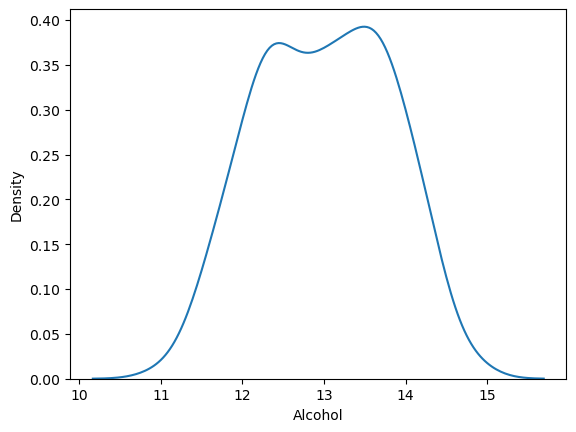

In [11]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

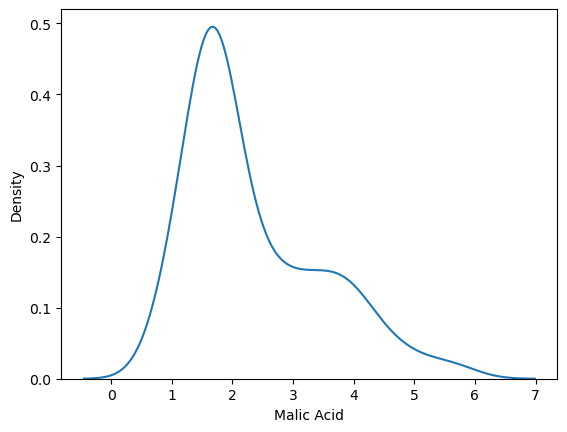

In [13]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

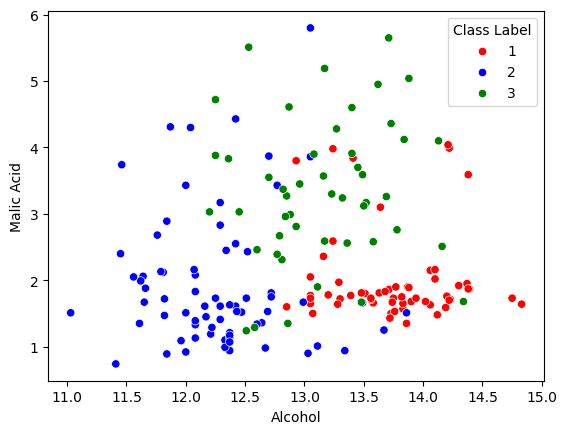

In [21]:
color_dict = {1:'red', 2:'blue', 3:'green'}
sns.scatterplot(data=df, x=df['Alcohol'], y=df['Malic Acid'], hue=df['Class Label'], palette=color_dict)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Class Label']), df['Class Label'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fitting model on the training set
scaler.fit(X_train)

# Transforming both train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [46]:
np.round(X_train_scaled.describe(), 2)

,Alcohol,Malic Acid
count,124.00,124.00
mean,0.53,0.31
std,0.22,0.24
min,0.00,0.00
25%,0.36,0.15
50%,0.54,0.21
75%,0.70,0.50
max,1.00,1.00


In [50]:
np.round(X_train.describe(), 2)

,Alcohol,Malic Acid
count,124.00,124.00
mean,12.98,2.38
std,0.80,1.14
min,11.03,0.89
25%,12.36,1.61
50%,13.04,1.88
75%,13.64,3.25
max,14.75,5.65


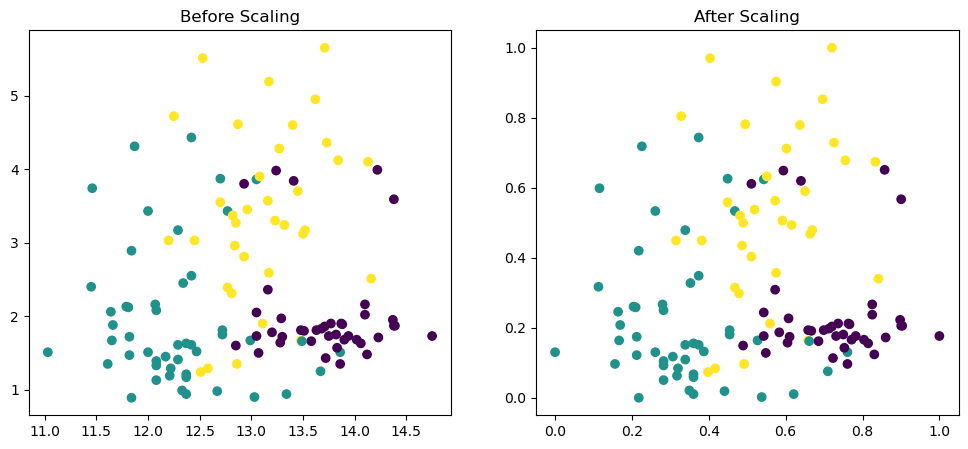

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'], c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'], c=y_train)
ax2.set_title('After Scaling')

plt.show()

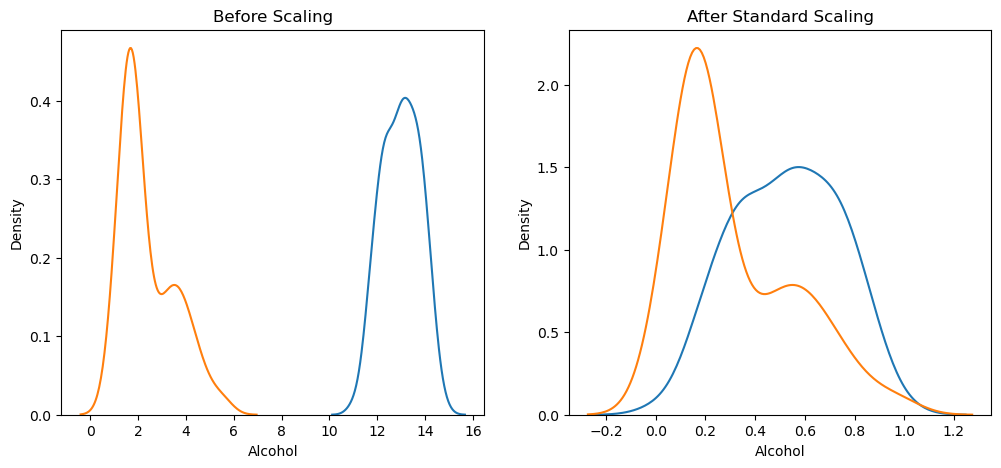

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# After Scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)
plt.show()

# Practice

In [ ]:
# Essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('Social_Network_Ads.csv', usecols=['Age','EstimatedSalary','Purchased'])

In [63]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

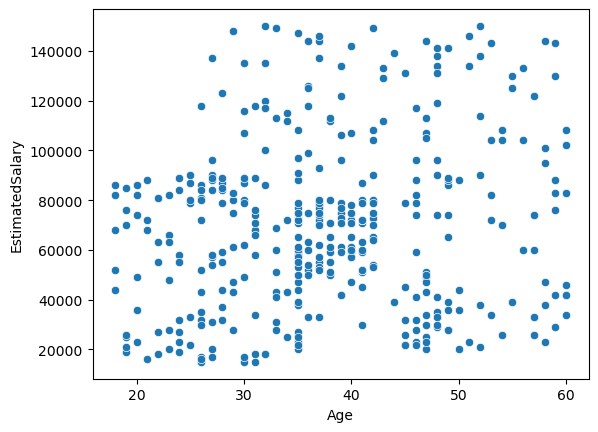

In [67]:
sns.scatterplot(data=df, x=df['Age'], y=df['EstimatedSalary'])

<Axes: xlabel='Age', ylabel='Density'>

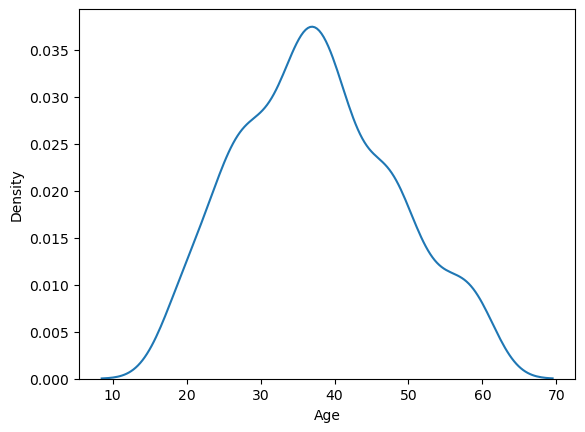

In [69]:
sns.kdeplot(df['Age'])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

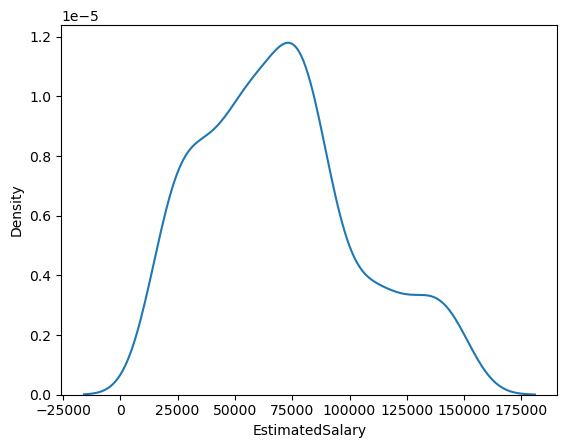

In [73]:
sns.kdeplot(df['EstimatedSalary'])

In [75]:
# Train_test_split
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Purchased']), df['Purchased'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

In [77]:
# Applying normalization technique: MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fitting on training data
scaler.fit(X_train)

# Transforming both sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
# Converting numpy array into DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [81]:
X_train_scaled.head()

,Age,EstimatedSalary
0,0.190476,0.000000
1,1.000000,0.644444
2,0.476190,0.718519
3,0.523810,0.681481
4,0.571429,0.281481


In [83]:
np.round(X_train_scaled.describe(), 2)

,Age,EstimatedSalary
count,280.00,280.00
mean,0.47,0.41
std,0.24,0.26
min,0.00,0.00
25%,0.29,0.21
50%,0.45,0.41
75%,0.67,0.54
max,1.00,1.00


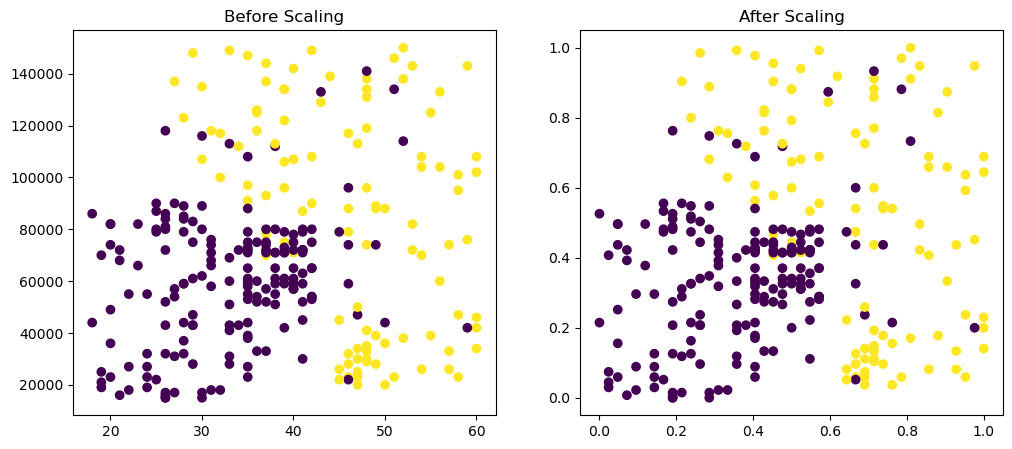

In [93]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.scatter(x=X_train['Age'], y=X_train['EstimatedSalary'], c=y_train)
ax1.set_title('Before Scaling')

# After Scaling
ax2.scatter( x=X_train_scaled['Age'], y=X_train_scaled['EstimatedSalary'], c=y_train)
ax2.set_title('After Scaling')
plt.show()